# Objective 01 - describe the components of an autoencoder

PS - An autoencoder is learning a compressed representation and the decoder outputs the reconstructed input.

Objective 02 - train an autoencoder

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:])) # reshape is saying to reshape to (60000, 784) really
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
input_img = Input(shape=(784, ))

In [6]:
# Create simple autoencoder

# The size of our encoded representations
# 32 float -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32

# "encoded" is the encoded representation of the input
encoded = Dense(units=encoding_dim, activation='relu')(input_img) # This is new bracket sort

# "decoded" is the lossy restruction of the input
decoded = Dense(units=784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
autoencoder.compile(optimizer='nadam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Fit the model
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
235/235 [==============================] - 2s 4ms/step - loss: 0.2711 - accuracy: 0.0138 - val_loss: 0.1899 - val_accuracy: 0.0130

In [11]:
# make the prediction with the test data
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

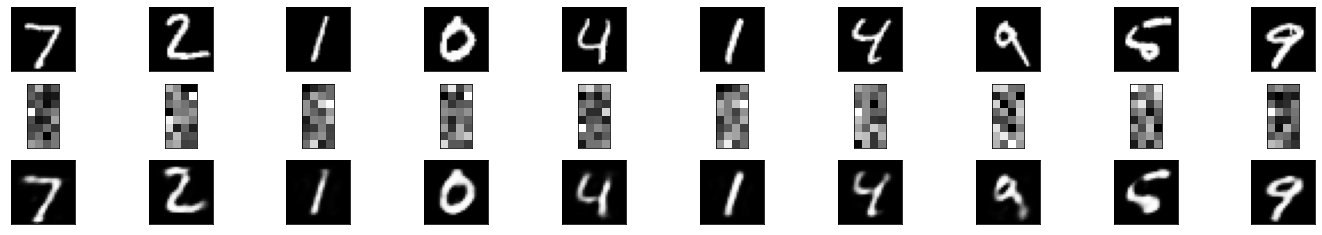

In [13]:
# Plotting code from:
# https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95

# Plot the results
plt.figure(figsize=(49, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show() # Uncomment to see the figure

